Index(['shapeName', 'shapeISO', 'shapeID', 'shapeGroup', 'shapeType',
       'geometry'],
      dtype='object')


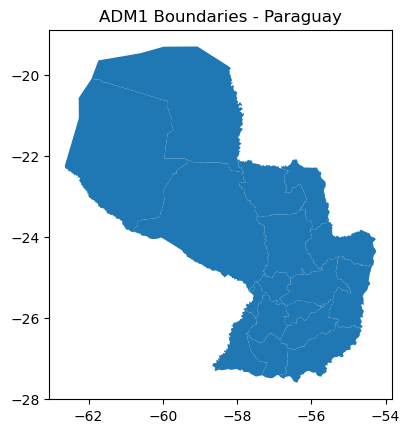

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

adm1 = gpd.read_file(r"C:\Users\benmi\OneDrive\Desktop\Land Data\Adm Level 1\geoBoundaries-PRY-ADM1.shp")  # or .shp if you have that

print(adm1.columns)
adm1 = gpd.read_file(r"C:\Users\benmi\OneDrive\Desktop\Land Data\Adm Level 1\geoBoundaries-PRY-ADM1.shp")
adm1.plot()
plt.title("ADM1 Boundaries - Paraguay")
plt.show()

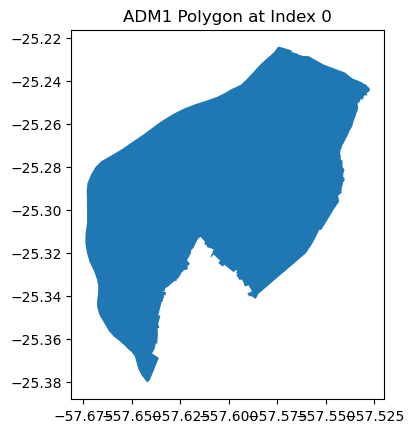

Is this Asunción? (y/n):  y


Found Asunción at index 0


In [4]:
for i in range(0, 50):  # Change 50 to a larger number if needed
    ax = adm1.iloc[[i]].plot()
    plt.title(f"ADM1 Polygon at Index {i}")
    plt.show()
    
    user_input = input("Is this Asunción? (y/n): ")
    if user_input.lower() == 'y':
        print(f"Found Asunción at index {i}")
        break

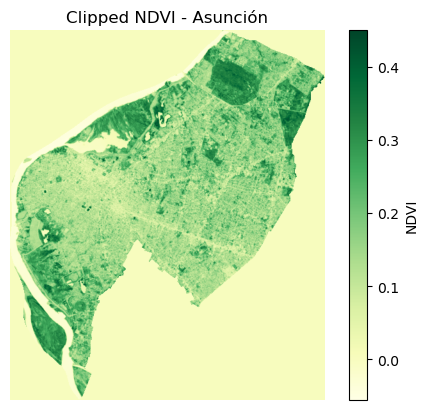

In [5]:
import rasterio
from rasterio.mask import mask

adm1.set_crs("EPSG:4326", inplace=True)
asuncion = adm1.iloc[[0]]  # index 0

# Open the NDVI raster
with rasterio.open(r"C:\Users\benmi\OneDrive\Desktop\Land Data\ndvi_output.tif") as src:
    # Reproject Asunción polygon to match the raster's CRS
    if asuncion.crs != src.crs:
        asuncion = asuncion.to_crs(src.crs)

    # Clip the raster with the Asunción polygon
    ndvi_clipped, transform = mask(src, asuncion.geometry, crop=True, filled=True,nodata=src.nodata)
    profile = src.profile.copy()
    profile.update({
        "height": ndvi_clipped.shape[1],
        "width": ndvi_clipped.shape[2],
        "transform": transform
    })
    
plt.imshow(ndvi_clipped[0], cmap='YlGn')
plt.title("Clipped NDVI - Asunción")
plt.colorbar(label="NDVI")
plt.axis('off')
plt.show()

In [6]:
with rasterio.open(r"C:\Users\benmi\OneDrive\Desktop\Land Data\ndvi_asuncion.tif", "w", **profile) as dst:
    dst.write(ndvi_clipped)